# Maximal Lyapunov Exponents (MLE)

https://en.wikipedia.org/wiki/Lyapunov_exponent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
start = '2021-01-01'
end = '2022-01-01'
symbol = 'AMD'

In [3]:
df = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,147.509995,154.889999,147.250000,154.360001,154.360001,53296400
2021-12-28,155.880005,156.729996,151.380005,153.149994,153.149994,58699100
2021-12-29,152.820007,154.339996,147.289993,148.259995,148.259995,51300200
2021-12-30,147.440002,148.850006,144.850006,145.149994,145.149994,44358000
2021-12-31,146.160004,148.610001,143.550003,143.899994,143.899994,49448100


In [6]:
df['Returns'] = df['Adj Close'].pct_change()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,0.005092
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,-0.026302
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,0.053471
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,-0.006095
2021-01-11,94.029999,99.230003,93.760002,97.250000,97.250000,48600200,0.028230


In [7]:
R = df['Returns']
LE = []
result = []

for r in R:
  x = np.random.random()
  for n in range(100):
    x = r*x*(1-x)
  result = []

  for n in range(100):
    x = r * x * (1-x)
    result.append(np.log(abs(r-2*r*x)))
  LE.append(np.mean(result))

In [8]:
LE

[-5.280080394456896,
 -3.638127362401481,
 -2.928622804667721,
 -5.100283742374287,
 -3.567368269951933,
 -3.9407084763643887,
 -3.2822958978372725,
 -4.529446889330755,
 -3.5607590488232836,
 -4.264610668042766,
 -4.850359079440073,
 -3.463372939754917,
 -4.285553357677083,
 -4.237672004190101,
 -5.089400794836345,
 -2.780964479829937,
 -4.209205452400347,
 -3.8405969844245784,
 -3.7470528301039874,
 -4.291146723107746,
 -4.517520053405119,
 -7.4717572658924345,
 -7.288841190097296,
 -3.2036343117422597,
 -5.095833917930129,
 -4.145230535604783,
 -5.6967519363194095,
 -4.424583227668404,
 -3.7035984719845576,
 -4.097193581872964,
 -4.236776196516646,
 -4.546456022594001,
 -3.057669670990255,
 -4.90902249232546,
 -3.651128278883107,
 -2.95670531456374,
 -3.6746621394970473,
 -3.8055995799413314,
 -3.6435061627872547,
 -3.247574230592404,
 -3.25809634931523,
 -4.614867674857267,
 -2.8460312385256215,
 -2.7840112560122003,
 -4.353528255911767,
 -3.039502237993003,
 -6.112081411061509,
 -

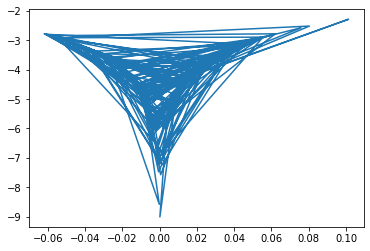

In [9]:
plt.plot(R, LE)
plt.show()

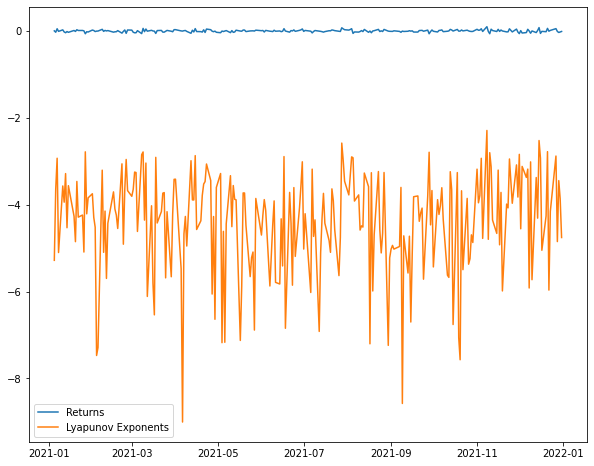

In [10]:
plt.figure(figsize=(10,8))
plt.plot(df.index, df['Returns'], label = 'Returns')
plt.plot(df.index, LE, label = 'Lyapunov Exponents')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Lyapunov Exponents')

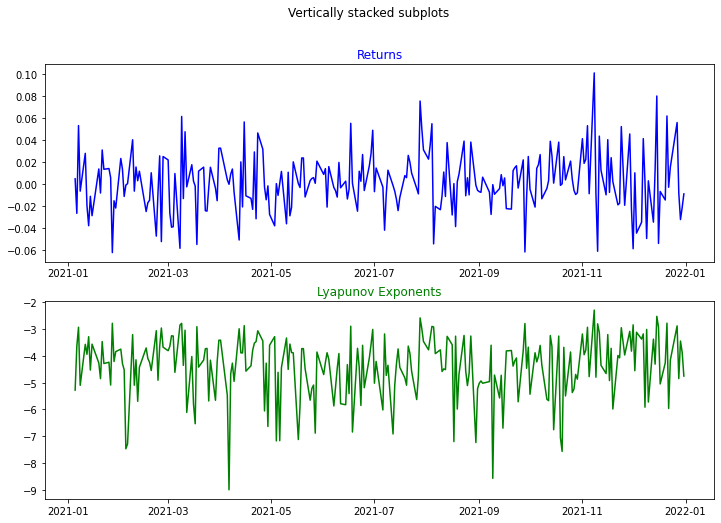

In [11]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df.index, df['Returns'], c='b')
axs[0].set_title('Returns', c='b')
axs[1].plot(df.index, LE, c='g')
axs[1].set_title('Lyapunov Exponents', c='g')